In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import scipy as scp
import scipy.stats as stats

## Old Data

In [22]:
clonality_old_df = pd.read_csv("combined_clonality_old.csv")
clonality_old_df.head(5)

,SAMPLE,nIGH,nIGK,nIGL,nTCRA,nTCRB,nTCRD,nTCRG,loadIGH,loadIGK,...,loadTCRB,loadTCRD,loadTCRG,alphaIGH,alphaIGK,alphaIGL,alphaTCRA,alphaTCRB,alphaTCRD,alphaTCRG
0,HH001_B1_SA_S2,10,56,13,195,3,1,0,22,209,...,7,2,0,2.271869,3.450863,2.523277,3.008696,1.078992,0,0
1,HH003_B3_SA_S6,0,2,0,175,0,0,0,0,4,...,0,0,0,0.000000,0.693147,0.000000,3.714189,0.000000,0,0
2,HH003_D_SA_S7,1,5,3,122,1,0,0,7,17,...,2,0,0,0.000000,1.537663,0.959615,4.187214,0.000000,0,0
3,HH003_K_SA_S8,0,0,0,99,0,0,0,0,0,...,0,0,0,0.000000,0.000000,0.000000,4.016620,0.000000,0,0
4,HH003_R_SA_S9,1,0,0,38,0,0,0,4,0,...,0,0,0,0.000000,0.000000,0.000000,3.320485,0.000000,0,0


In [18]:
line_counts_old_df = pd.read_csv("line_counts_old.csv")

line_counts_old_df["line_counts"] = line_counts_old_df["line_counts"] / 4
line_counts_old_df.head(10)

,SAMPLE,line_counts
0,HH001_A1_SA_S1,87147897.0
1,HH001_B1_SA_S2,82613923.0
2,HH001_B3_SA_S3,193979940.0
3,HH003_A1_SA_S4,212200004.0
4,HH003_A3_SA_S5,97778641.0
5,HH003_B3_SA_S6,75234983.0
6,HH003_D_SA_S7,63623783.0
7,HH003_K_SA_S8,39694161.0
8,HH003_R_SA_S9,15125472.0


In [19]:
normalized_clonality_old_df=pd.merge(clonality_old_df, line_counts_old_df, on='SAMPLE')
normalized_clonality_old_df.head(10)

,SAMPLE,nIGH,nIGK,nIGL,nTCRA,nTCRB,nTCRD,nTCRG,loadIGH,loadIGK,...,loadTCRD,loadTCRG,alphaIGH,alphaIGK,alphaIGL,alphaTCRA,alphaTCRB,alphaTCRD,alphaTCRG,line_counts
0,HH001_B1_SA_S2,10,56,13,195,3,1,0,22,209,...,2,0,2.271869,3.450863,2.523277,3.008696,1.078992,0,0,82613923.0
1,HH003_B3_SA_S6,0,2,0,175,0,0,0,0,4,...,0,0,0.000000,0.693147,0.000000,3.714189,0.000000,0,0,75234983.0
2,HH003_D_SA_S7,1,5,3,122,1,0,0,7,17,...,0,0,0.000000,1.537663,0.959615,4.187214,0.000000,0,0,63623783.0
3,HH003_K_SA_S8,0,0,0,99,0,0,0,0,0,...,0,0,0.000000,0.000000,0.000000,4.016620,0.000000,0,0,39694161.0
4,HH003_R_SA_S9,1,0,0,38,0,0,0,4,0,...,0,0,0.000000,0.000000,0.000000,3.320485,0.000000,0,0,15125472.0


## New Data

In [21]:
clonality_new_df = pd.read_csv("combined_clonality_new.csv")
clonality_new_df.head(5)

,SAMPLE,nIGH,nIGK,nIGL,nTCRA,nTCRB,nTCRD,nTCRG,loadIGH,loadIGK,...,loadTCRB,loadTCRD,loadTCRG,alphaIGH,alphaIGK,alphaIGL,alphaTCRA,alphaTCRB,alphaTCRD,alphaTCRG
0,004-B1_S3_L001,3,95,31,1,0,0,0,6,666,...,0,0,0,1.098612,3.093716,3.242313,0.0,0.0,0,0
1,004-B1_S3_L002,10,112,44,0,0,0,0,21,719,...,0,0,0,2.293452,3.453029,3.681735,0.0,0.0,0,0
2,004-B1_S3_L003,3,93,30,0,0,0,0,9,657,...,0,0,0,1.060857,3.125064,3.274893,0.0,0.0,0,0
3,004-B1_S3_L004,4,50,9,1,0,0,0,8,345,...,0,0,0,1.386294,2.787626,2.127805,0.0,0.0,0,0
4,004-B2_S4_L001,13,169,69,1,1,0,0,40,1295,...,3,0,0,2.447701,3.678192,4.049689,0.0,0.0,0,0


In [23]:
line_counts_new_df = pd.read_csv("line_counts_new.csv")

line_counts_new_df["line_counts"] = line_counts_new_df["line_counts"] / 4
line_counts_new_df.head(10)

,SAMPLE,line_counts
0,004-B1_S3_L001,6037153.0
1,004-B1_S3_L002,6136852.0
2,004-B1_S3_L003,5911791.0
3,004-B1_S3_L004,6002070.0
4,004-B2_S4_L001,6747024.0
5,004-B2_S4_L002,6845379.0
6,004-B2_S4_L003,6615411.0
7,004-B2_S4_L004,6675801.0
8,004-E_S5_L001,7956783.0
9,004-E_S5_L002,8115173.0


In [25]:
normalized_clonality_new_df=pd.merge(clonality_new_df, line_counts_new_df, on='SAMPLE')
normalized_clonality_new_df.head(5)

,SAMPLE,nIGH,nIGK,nIGL,nTCRA,nTCRB,nTCRD,nTCRG,loadIGH,loadIGK,...,loadTCRD,loadTCRG,alphaIGH,alphaIGK,alphaIGL,alphaTCRA,alphaTCRB,alphaTCRD,alphaTCRG,line_counts
0,004-B1_S3_L001,3,95,31,1,0,0,0,6,666,...,0,0,1.098612,3.093716,3.242313,0.0,0.0,0,0,6037153.0
1,004-B1_S3_L002,10,112,44,0,0,0,0,21,719,...,0,0,2.293452,3.453029,3.681735,0.0,0.0,0,0,6136852.0
2,004-B1_S3_L003,3,93,30,0,0,0,0,9,657,...,0,0,1.060857,3.125064,3.274893,0.0,0.0,0,0,5911791.0
3,004-B1_S3_L004,4,50,9,1,0,0,0,8,345,...,0,0,1.386294,2.787626,2.127805,0.0,0.0,0,0,6002070.0
4,004-B2_S4_L001,13,169,69,1,1,0,0,40,1295,...,0,0,2.447701,3.678192,4.049689,0.0,0.0,0,0,6747024.0


# Normalize data

In [26]:
normalized_clonality_old_df["nIGH"] = (normalized_clonality_old_df["nIGH"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["nIGK"] = (normalized_clonality_old_df["nIGK"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["nIGL"] = (normalized_clonality_old_df["nIGL"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["nTCRA"] = (normalized_clonality_old_df["nTCRA"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["nTCRB"] = (normalized_clonality_old_df["nTCRB"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["nTCRD"] = (normalized_clonality_old_df["nTCRD"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["nTCRG"] = (normalized_clonality_old_df["nTCRG"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadIGH"] = (normalized_clonality_old_df["loadIGH"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadIGK"] = (normalized_clonality_old_df["loadIGK"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadIGL"] = (normalized_clonality_old_df["loadIGL"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadTCRA"] = (normalized_clonality_old_df["loadTCRA"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadTCRB"] = (normalized_clonality_old_df["loadTCRB"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadTCRD"] = (normalized_clonality_old_df["loadTCRD"] / normalized_clonality_old_df["line_counts"]) * 1000000
normalized_clonality_old_df["loadTCRG"] = (normalized_clonality_old_df["loadTCRG"] / normalized_clonality_old_df["line_counts"]) * 1000000

normalized_clonality_old_df.head(10)

normalized_clonality_old_df.to_csv("normalized_clonality_old.csv", index=False)

In [27]:
normalized_clonality_new_df["nIGH"] = (normalized_clonality_new_df["nIGH"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["nIGK"] = (normalized_clonality_new_df["nIGK"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["nIGL"] = (normalized_clonality_new_df["nIGL"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["nTCRA"] = (normalized_clonality_new_df["nTCRA"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["nTCRB"] = (normalized_clonality_new_df["nTCRB"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["nTCRD"] = (normalized_clonality_new_df["nTCRD"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["nTCRG"] = (normalized_clonality_new_df["nTCRG"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadIGH"] = (normalized_clonality_new_df["loadIGH"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadIGK"] = (normalized_clonality_new_df["loadIGK"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadIGL"] = (normalized_clonality_new_df["loadIGL"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadTCRA"] = (normalized_clonality_new_df["loadTCRA"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadTCRB"] = (normalized_clonality_new_df["loadTCRB"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadTCRD"] = (normalized_clonality_new_df["loadTCRD"] / normalized_clonality_new_df["line_counts"]) * 1000000
normalized_clonality_new_df["loadTCRG"] = (normalized_clonality_new_df["loadTCRG"] / normalized_clonality_new_df["line_counts"]) * 1000000

normalized_clonality_new_df.head(10)

normalized_clonality_new_df.to_csv("normalized_clonality_new.csv", index=False)

## Old_Data

In [30]:
metadata_old_df = pd.read_csv("metadata_old.csv")
metadata_old_df.head(10)

,SAMPLE,MSSA/MRSA,Date_of_First_(+)_Blood_Culture,time_point_collected(day),Persistent_Bacteremia?,Persistent_Bact?
0,HH001_A1_SA_S1,MSSA,2/6/19,1,yes,1
1,HH001_B1_SA_S2,MSSA,2/6/19,4,yes,1
2,HH001_B3_SA_S3,MSSA,2/6/19,6,yes,1
3,HH003_A1_SA_S4,MSSA,5/5/19,1,no,0
4,HH003_A3_SA_S5,MSSA,5/5/19,3,no,0
5,HH003_B3_SA_S6,MSSA,5/5/19,5,no,0
6,HH003_D_SA_S7,MSSA,5/5/19,7,no,0
7,HH003_K_SA_S8,MSSA,5/5/19,14,no,0
8,HH003_R_SA_S9,MSSA,5/5/19,21,no,0


/Users/dhrithideshpande/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


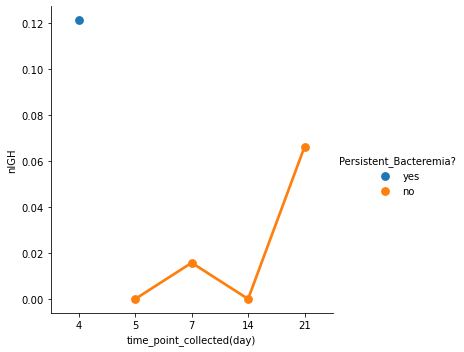

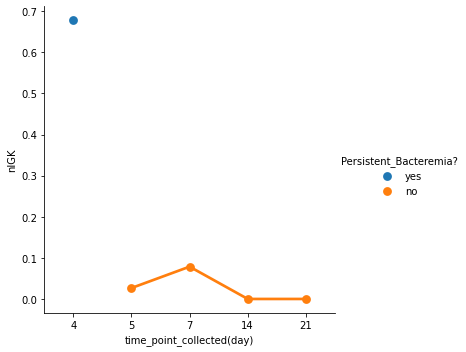

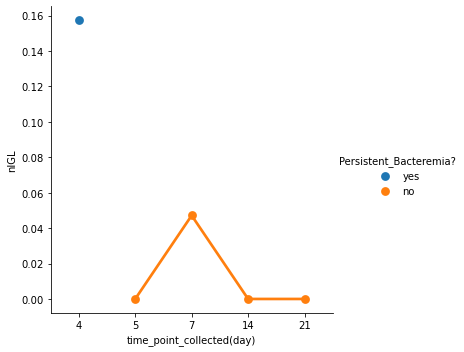

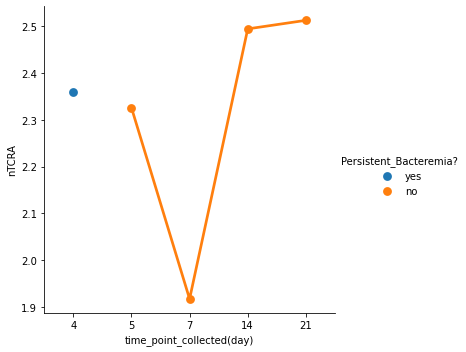

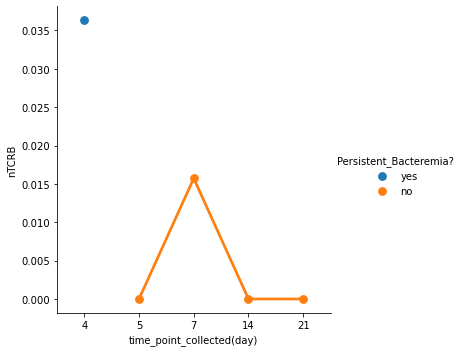

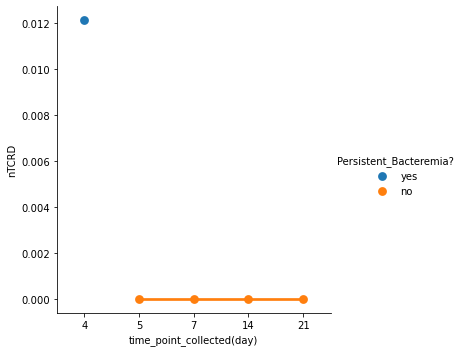

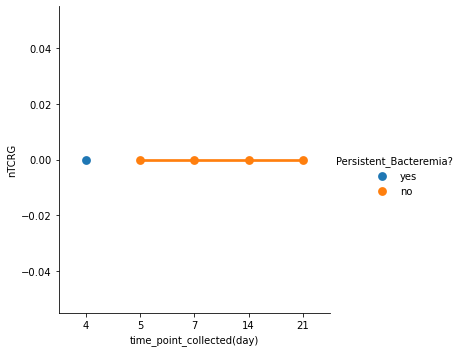

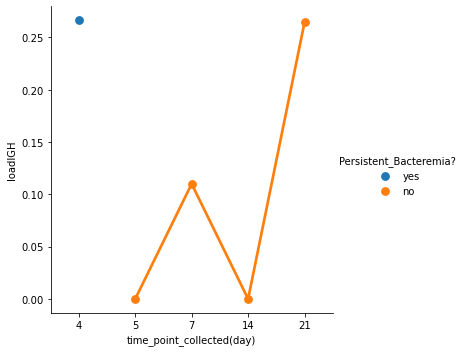

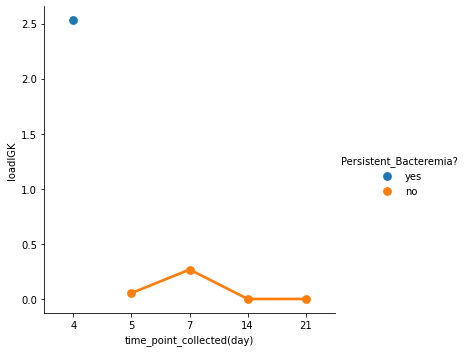

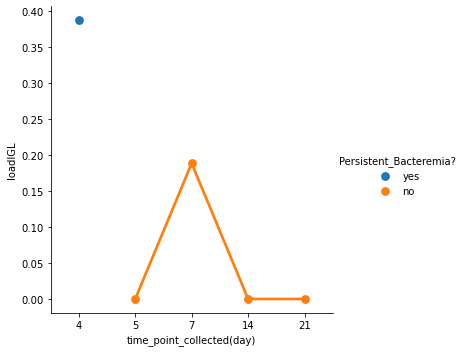

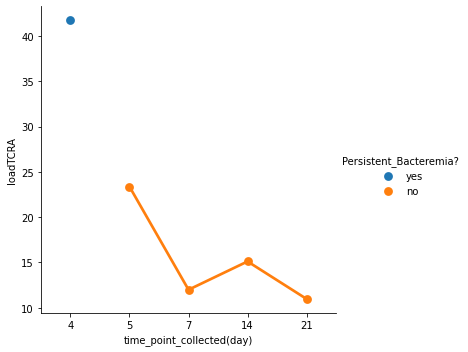

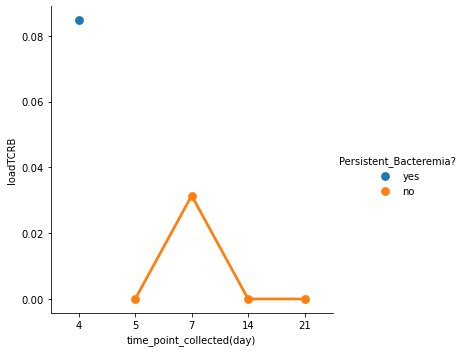

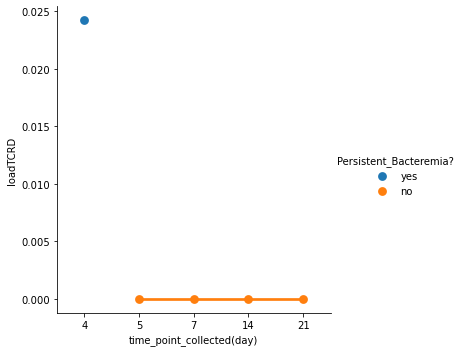

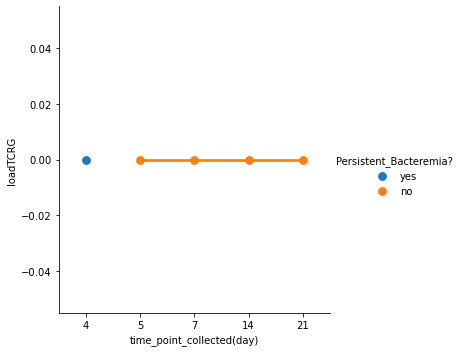

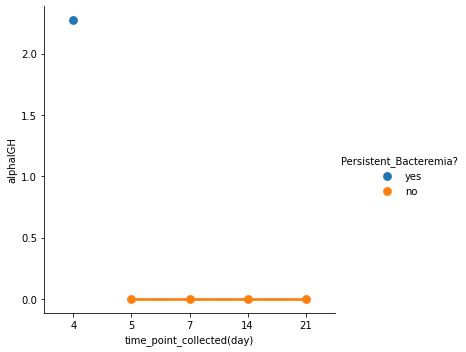

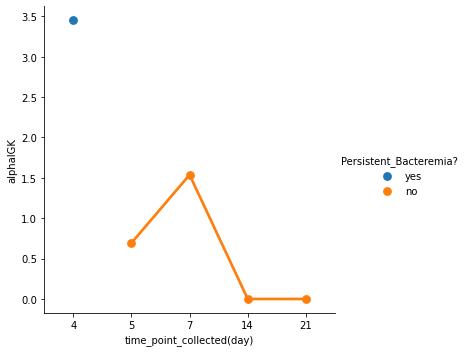

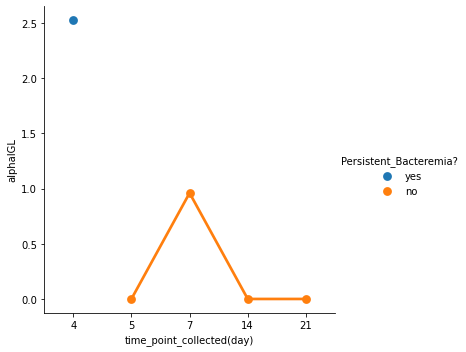

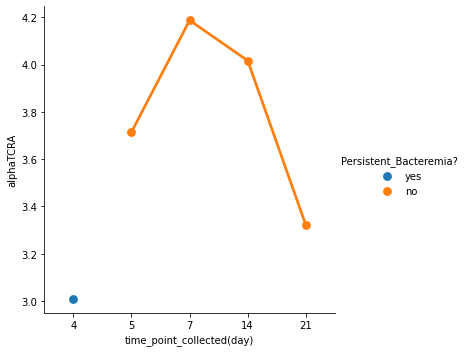

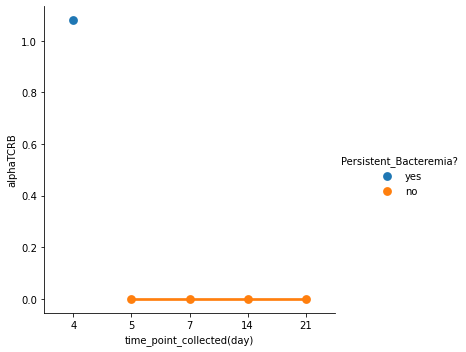

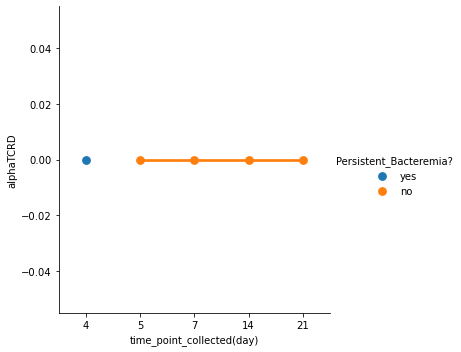

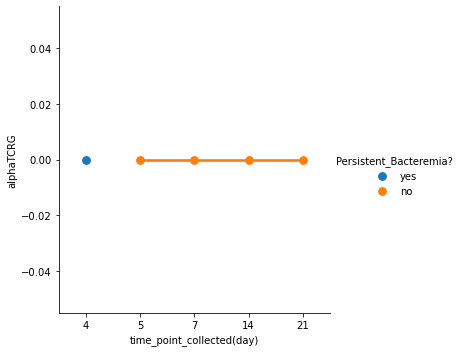

In [33]:
normalized_merged_meta_clonality_df=pd.merge(normalized_clonality_old_df, metadata_old_df, on='SAMPLE')

normalized_merged_meta_clonality_df.head(10)

normalized_merged_meta_clonality_df.to_csv("normalized_clonality_with_metadata.csv", index=False)

import seaborn as sns

clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", "nTCRG", "loadIGH", 
              "loadIGK", "loadIGL", "loadTCRA", "loadTCRB", "loadTCRD", "loadTCRG", 
              "alphaIGH", "alphaIGK", "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
for clono_type in clonotypes:
    g = sns.catplot(x="time_point_collected(day)", y=clono_type, hue="Persistent_Bacteremia?", 
                    data=normalized_merged_meta_clonality_df, kind = "point")

Ttest_indResult(statistic=-3.5803804670310715, pvalue=0.0071842934283666724)

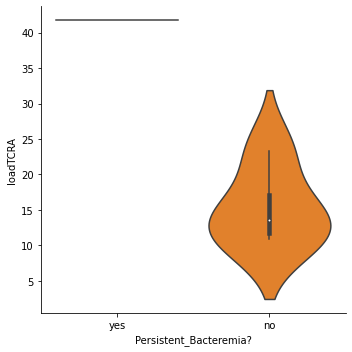

In [34]:
import seaborn as sns
from scipy.stats import ttest_ind

g = sns.catplot(x="Persistent_Bacteremia?", y="loadTCRA", data=normalized_merged_meta_clonality_df, kind="violin")

ttest_ind(normalized_merged_meta_clonality_df['Persistent_Bact?'],normalized_merged_meta_clonality_df['loadTCRA'])

In [35]:
clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", 
              "nTCRG", "loadIGH", "loadIGK", "loadIGL", "loadTCRA", 
              "loadTCRB", "loadTCRD", "loadTCRG", "alphaIGH", "alphaIGK",
              "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
print("\n ttest clonotype vs persistent bacterermia \n ")
for clonotype in clonotypes:
    print(clonotype, ttest_ind(normalized_merged_meta_clonality_df['Persistent_Bact?'],
                               normalized_merged_meta_clonality_df[clonotype]))


 ttest clonotype vs persistent bacterermia 
 
nIGH Ttest_indResult(statistic=0.791680998210687, pvalue=0.4513796838550066)
nIGK Ttest_indResult(statistic=0.18146650917649393, pvalue=0.8605148592690803)
nIGL Ttest_indResult(statistic=0.7863903346160754, pvalue=0.45430014288932996)
nTCRA Ttest_indResult(statistic=-9.346765918412057, pvalue=1.40228440452027e-05)
nTCRB Ttest_indResult(statistic=0.9473628411549401, pvalue=0.3711875413380922)
nTCRD Ttest_indResult(statistic=0.9878231380898087, pvalue=0.3521703776115668)
nTCRG Ttest_indResult(statistic=0.9999999999999999, pvalue=0.34659350708733416)
loadIGH Ttest_indResult(statistic=0.34430448328764496, pvalue=0.7394929032764799)
loadIGK Ttest_indResult(statistic=-0.6962354918073488, pvalue=0.5060022464565403)
loadIGL Ttest_indResult(statistic=0.39558442291890666, pvalue=0.7027513857427109)
loadTCRA Ttest_indResult(statistic=-3.5803804670310715, pvalue=0.0071842934283666724)
loadTCRB Ttest_indResult(statistic=0.8808282730117102, pvalue=0.404

/Users/dhrithideshpande/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


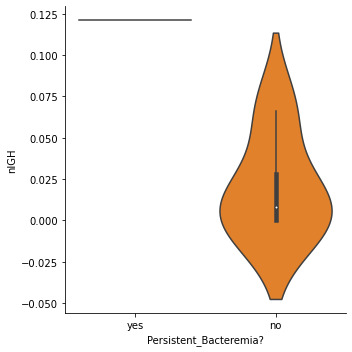

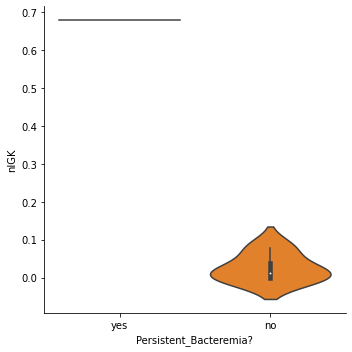

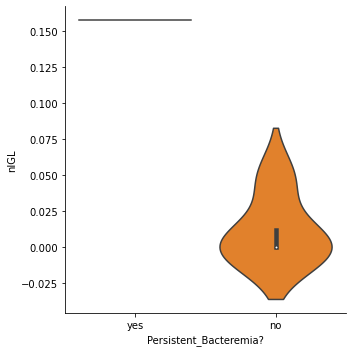

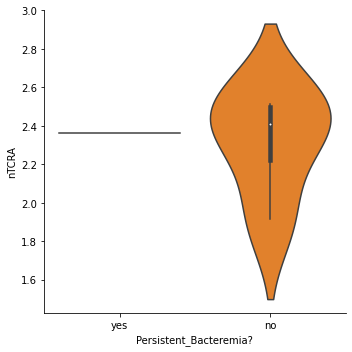

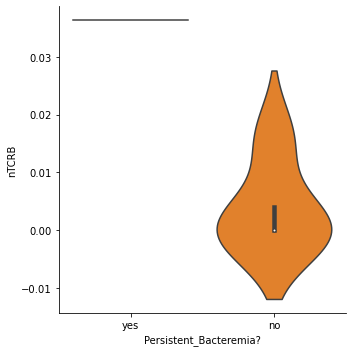

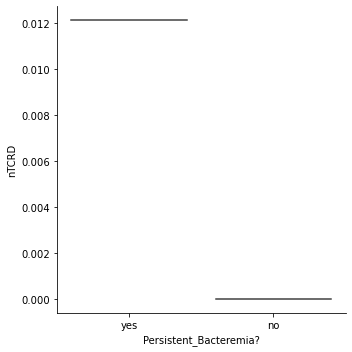

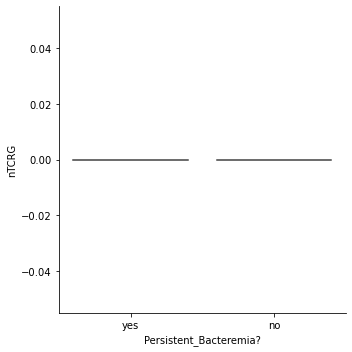

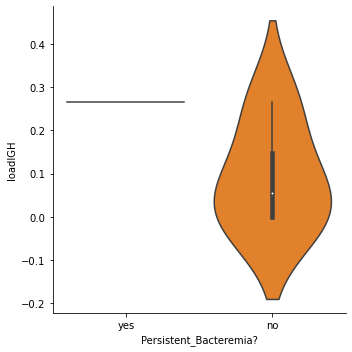

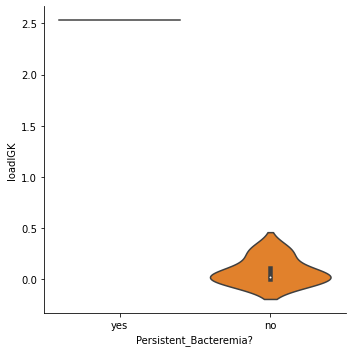

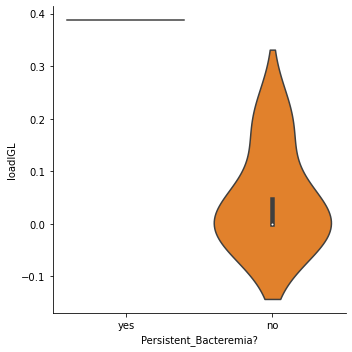

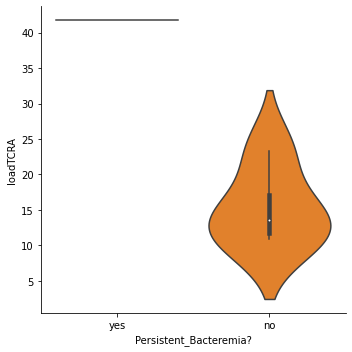

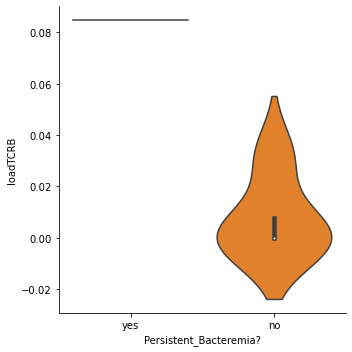

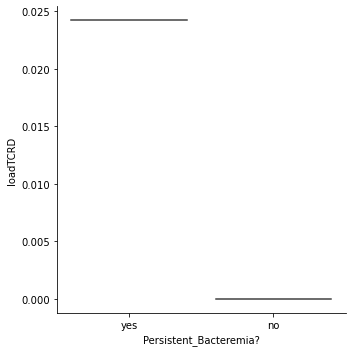

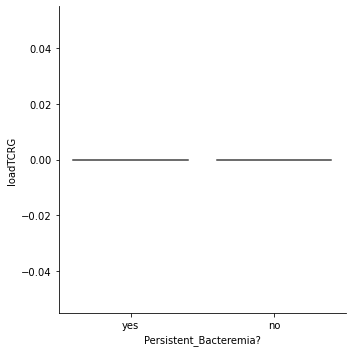

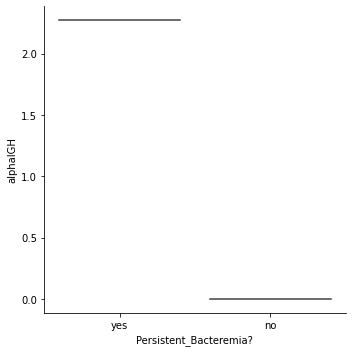

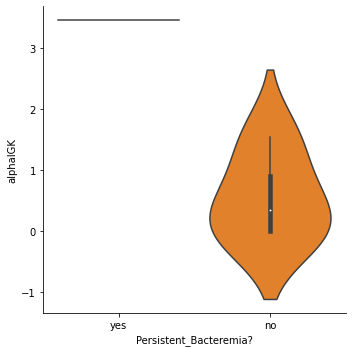

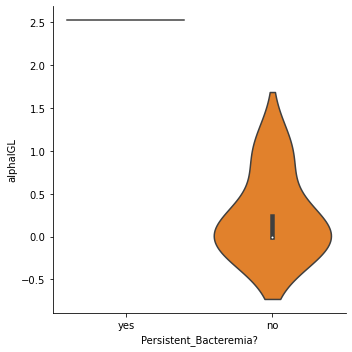

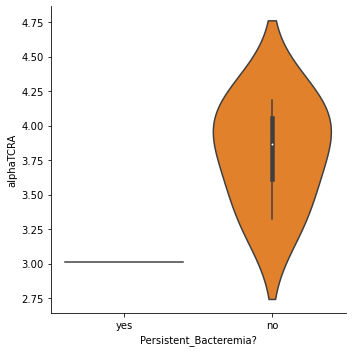

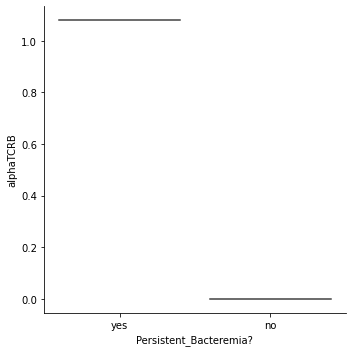

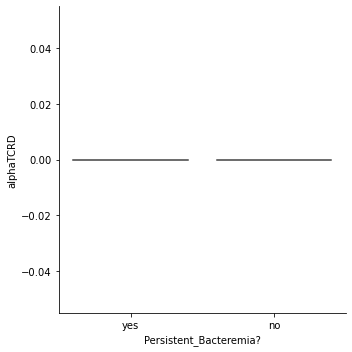

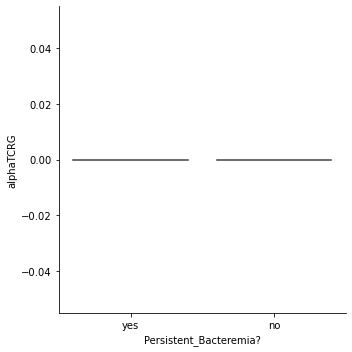

In [36]:
clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", 
              "nTCRG", "loadIGH", "loadIGK", "loadIGL", "loadTCRA", 
              "loadTCRB", "loadTCRD", "loadTCRG", "alphaIGH", "alphaIGK", 
              "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
for clonotype in clonotypes:
    g = sns.catplot(x="Persistent_Bacteremia?", y=clonotype,data=normalized_merged_meta_clonality_df, kind="violin")

/Users/dhrithideshpande/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


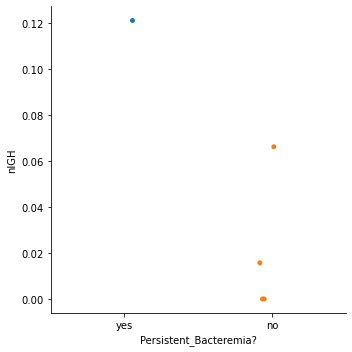

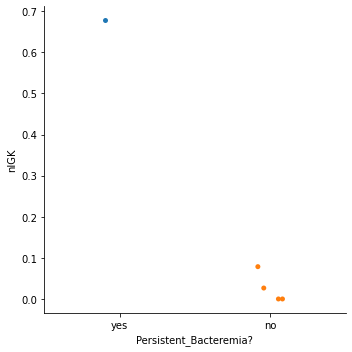

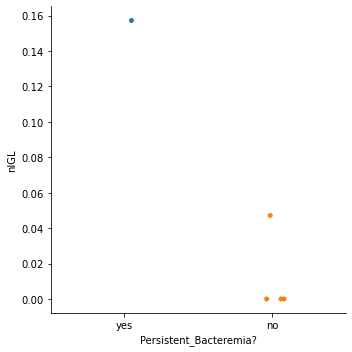

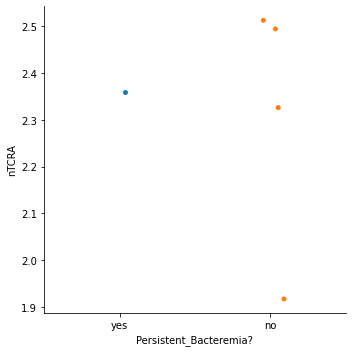

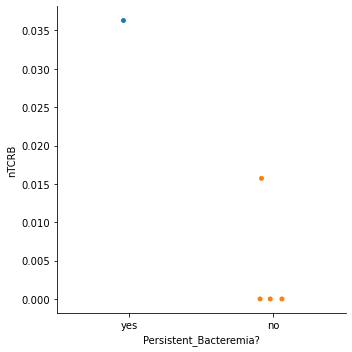

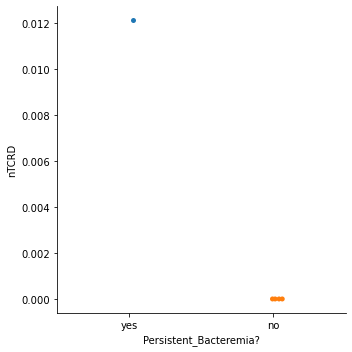

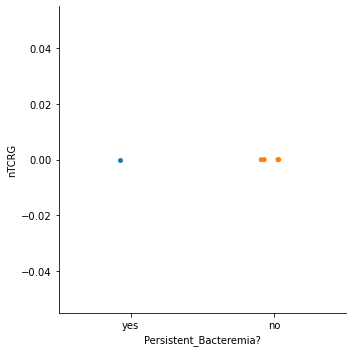

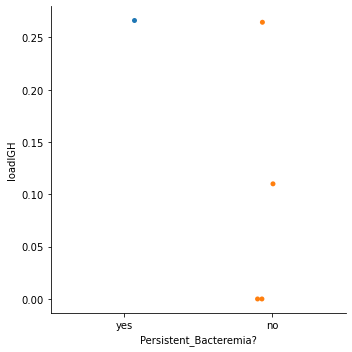

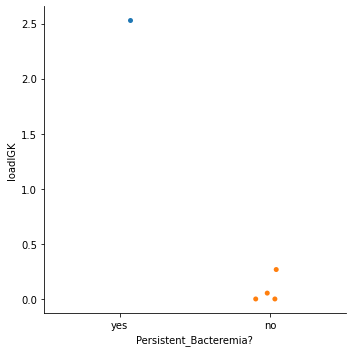

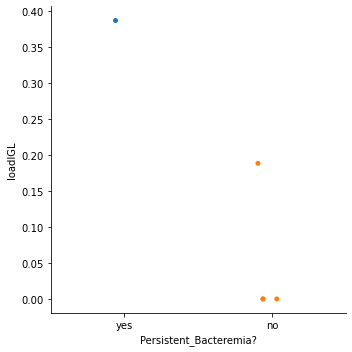

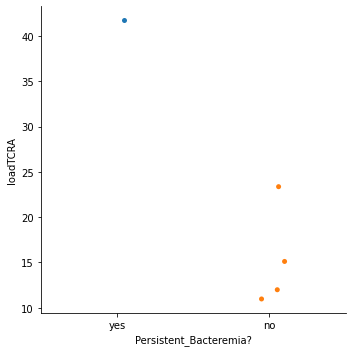

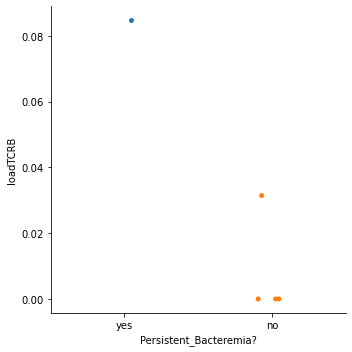

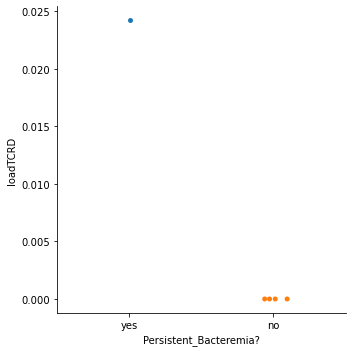

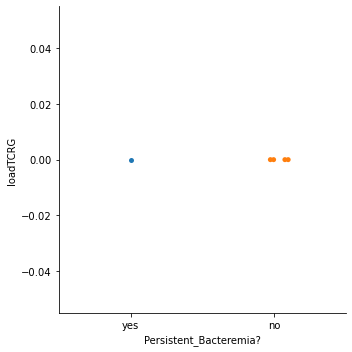

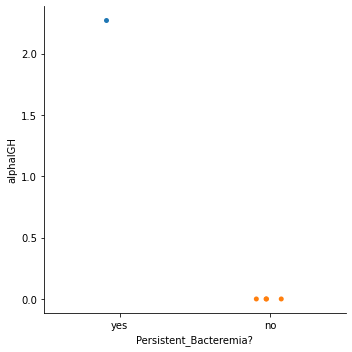

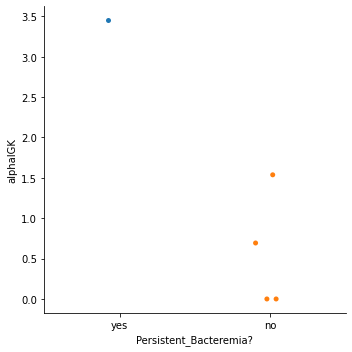

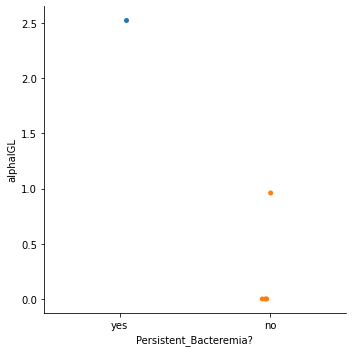

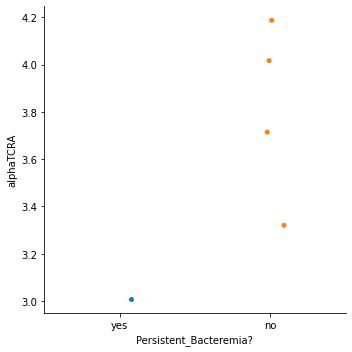

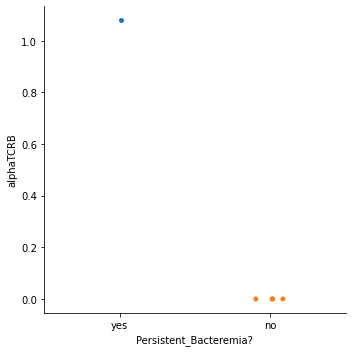

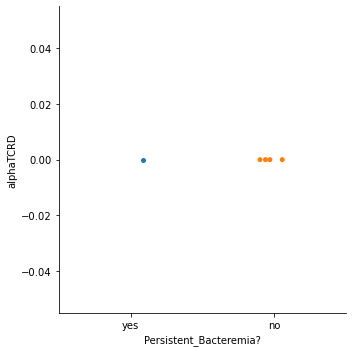

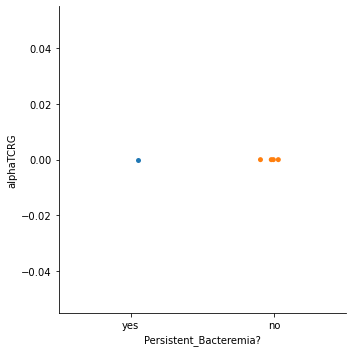

In [37]:
clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", 
              "nTCRG", "loadIGH", "loadIGK", "loadIGL", "loadTCRA", 
              "loadTCRB", "loadTCRD", "loadTCRG", "alphaIGH", "alphaIGK", 
              "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
for clonotype in clonotypes:
    g = sns.catplot(x="Persistent_Bacteremia?", y=clonotype, data=normalized_merged_meta_clonality_df)

## New Data

In [39]:
metadata_new_df = pd.read_csv("metadata_new.csv")
metadata_new_df.head(10)

,SAMPLE,MSSA/MRSA,Date_of_First_(+)_Blood_Culture,time_point_collected(day),Persistent_Bacteremia?,Persistent_Bact?
0,004-B1_S3_L001,NaN,1/31/20,2,yes,1
1,004-B1_S3_L002,NaN,1/31/20,2,yes,1
2,004-B1_S3_L003,NaN,1/31/20,2,yes,1
3,004-B1_S3_L004,NaN,1/31/20,2,yes,1
4,004-B2_S4_L001,NaN,2/1/20,3,yes,1
5,004-B2_S4_L002,NaN,2/1/20,3,yes,1
6,004-B2_S4_L003,NaN,2/1/20,3,yes,1
7,004-B2_S4_L004,NaN,2/1/20,3,yes,1
8,004-E_S5_L001,NaN,2/5/20,8,yes,1
9,004-E_S5_L002,NaN,2/5/20,8,yes,1


/Users/dhrithideshpande/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


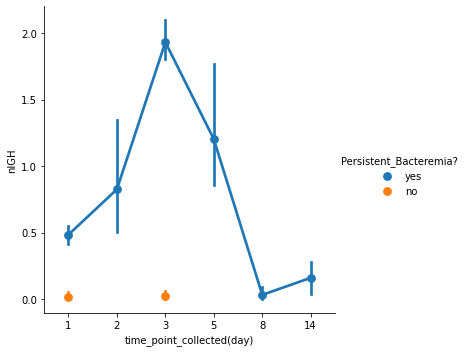

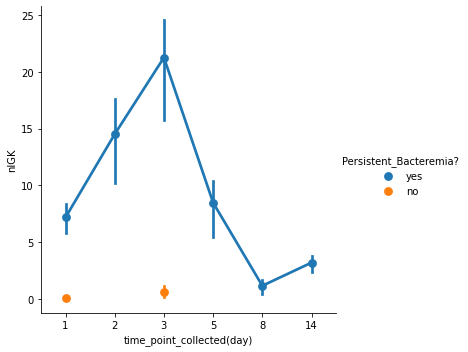

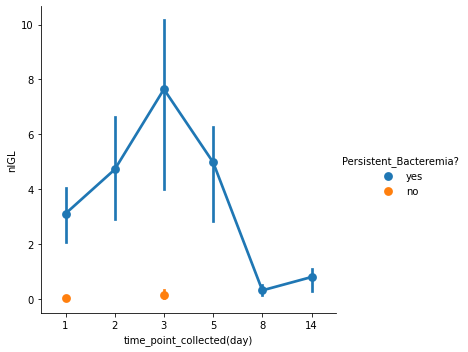

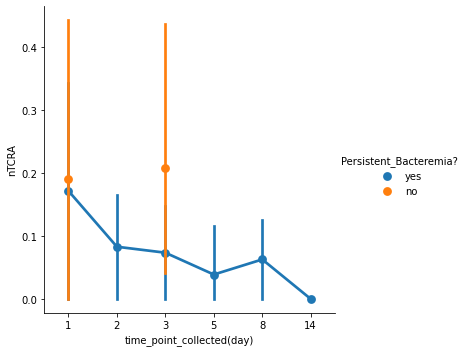

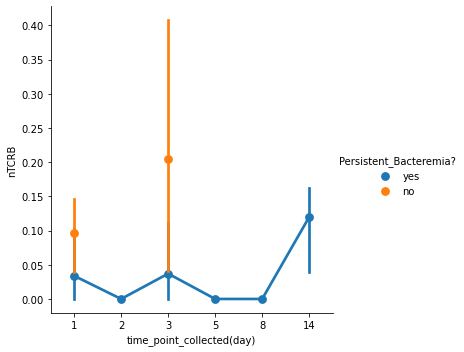

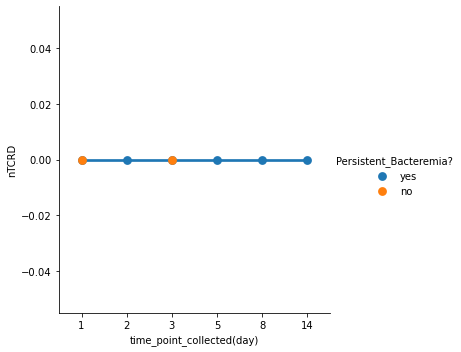

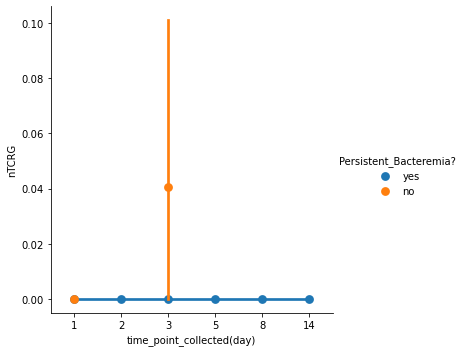

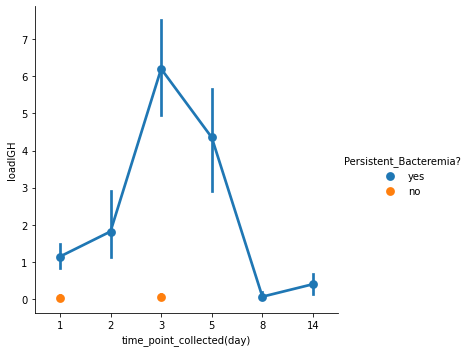

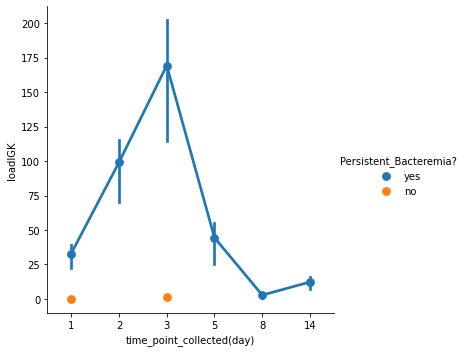

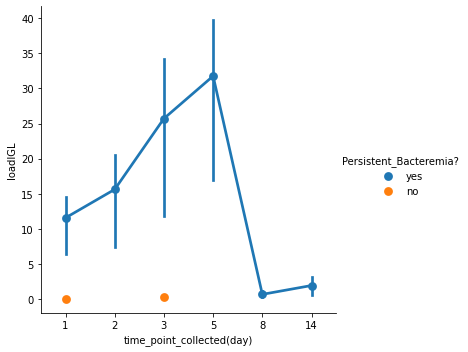

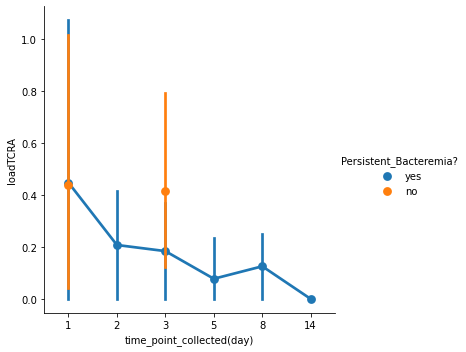

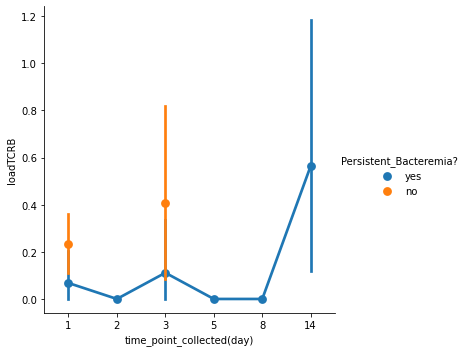

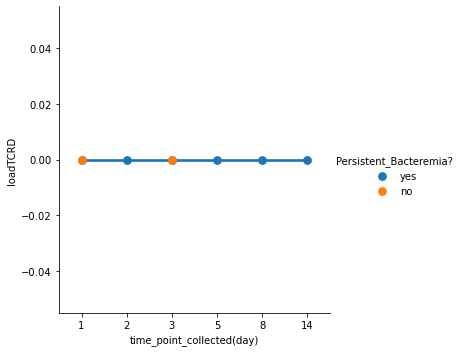

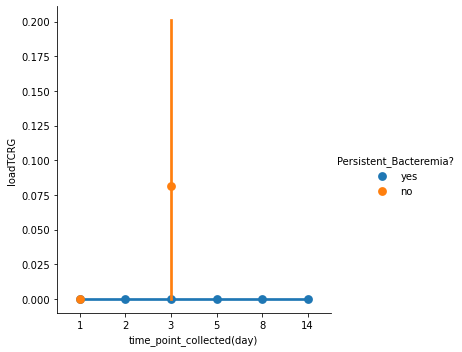

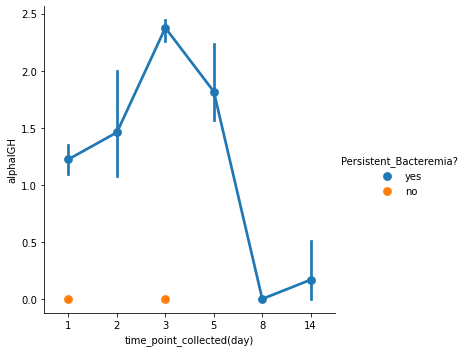

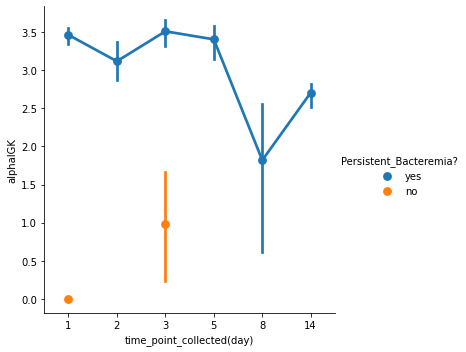

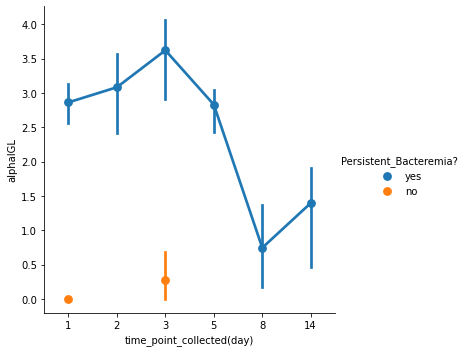

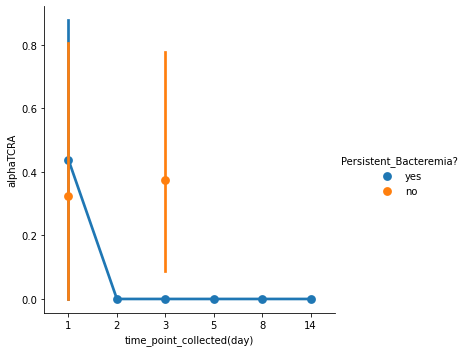

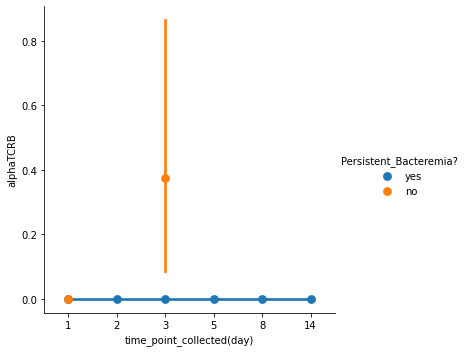

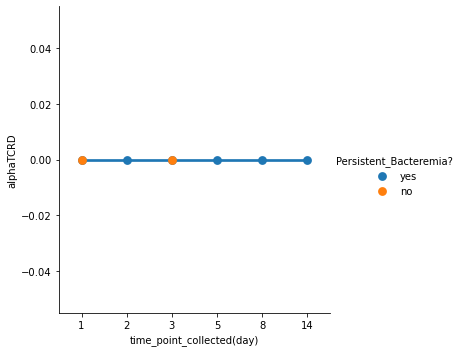

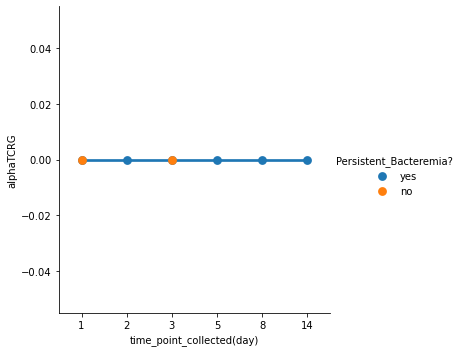

In [40]:
normalized_merged_meta_clonality_df=pd.merge(normalized_clonality_new_df, metadata_new_df, on='SAMPLE')

normalized_merged_meta_clonality_df.head(10)

normalized_merged_meta_clonality_df.to_csv("normalized_clonality_with_metadata.csv", index=False)

import seaborn as sns

clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", "nTCRG", "loadIGH", 
              "loadIGK", "loadIGL", "loadTCRA", "loadTCRB", "loadTCRD", "loadTCRG", 
              "alphaIGH", "alphaIGK", "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
for clono_type in clonotypes:
    g = sns.catplot(x="time_point_collected(day)", y=clono_type, hue="Persistent_Bacteremia?", 
                    data=normalized_merged_meta_clonality_df, kind = "point")

Ttest_indResult(statistic=2.9213094995080615, pvalue=0.004556963552215849)

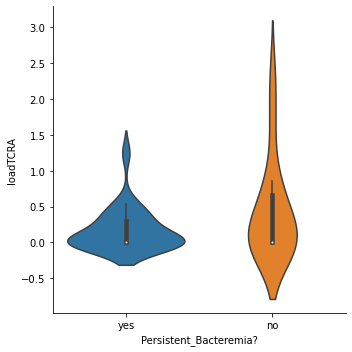

In [41]:
import seaborn as sns
from scipy.stats import ttest_ind

g = sns.catplot(x="Persistent_Bacteremia?", y="loadTCRA", data=normalized_merged_meta_clonality_df, kind="violin")

ttest_ind(normalized_merged_meta_clonality_df['Persistent_Bact?'],normalized_merged_meta_clonality_df['loadTCRA'])

In [42]:
clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", 
              "nTCRG", "loadIGH", "loadIGK", "loadIGL", "loadTCRA", 
              "loadTCRB", "loadTCRD", "loadTCRG", "alphaIGH", "alphaIGK",
              "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
print("\n ttest clonotype vs persistent bacterermia \n ")
for clonotype in clonotypes:
    print(clonotype, ttest_ind(normalized_merged_meta_clonality_df['Persistent_Bact?'],
                               normalized_merged_meta_clonality_df[clonotype]))


 ttest clonotype vs persistent bacterermia 
 
nIGH Ttest_indResult(statistic=0.976300279399103, pvalue=0.33193393698146356)
nIGK Ttest_indResult(statistic=-4.427928089896711, pvalue=3.0591248721504966e-05)
nIGL Ttest_indResult(statistic=-3.3021353952043357, pvalue=0.0014494819662055776)
nTCRA Ttest_indResult(statistic=5.554934834391568, pvalue=3.712748815231044e-07)
nTCRB Ttest_indResult(statistic=6.353641710281004, pvalue=1.2989857344666142e-08)
nTCRD Ttest_indResult(statistic=7.648529270389177, pvalue=4.498205134696029e-11)
nTCRG Ttest_indResult(statistic=7.525191480212473, pvalue=7.775163227294095e-11)
loadIGH Ttest_indResult(statistic=-2.289716138251348, pvalue=0.024741708839580868)
loadIGK Ttest_indResult(statistic=-3.9766056509187084, pvalue=0.00015519369543960752)
loadIGL Ttest_indResult(statistic=-3.9718219555578957, pvalue=0.000157806274484362)
loadTCRA Ttest_indResult(statistic=2.9213094995080615, pvalue=0.004556963552215849)
loadTCRB Ttest_indResult(statistic=4.050827893657

/Users/dhrithideshpande/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


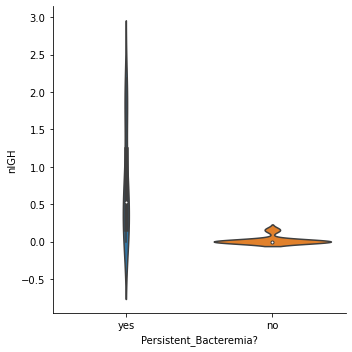

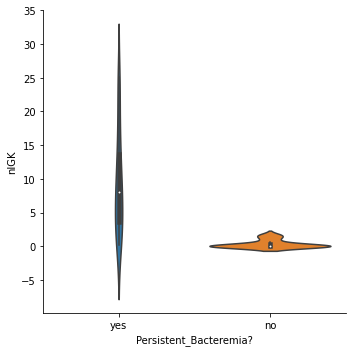

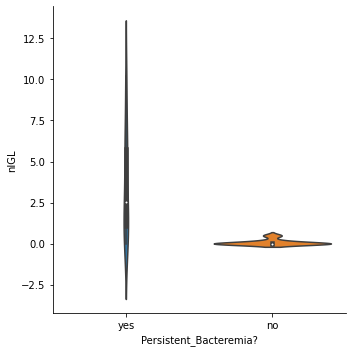

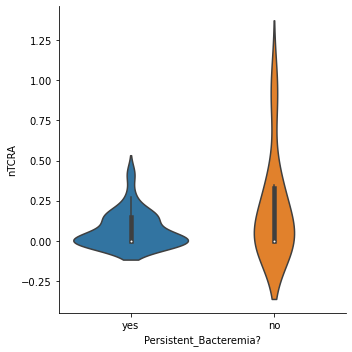

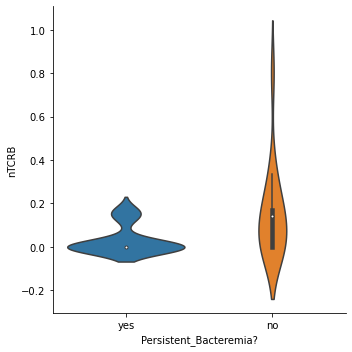

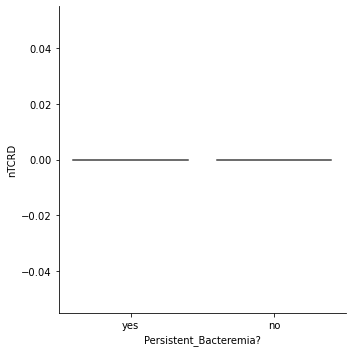

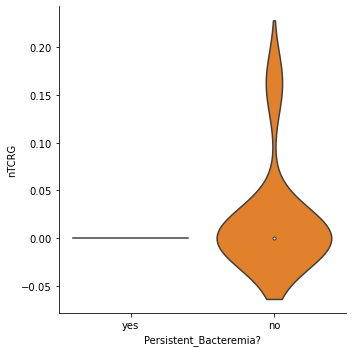

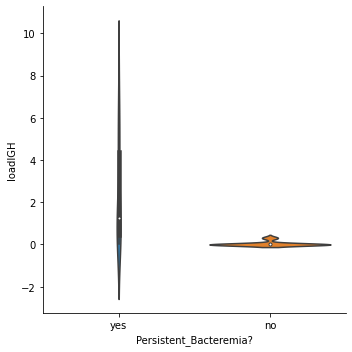

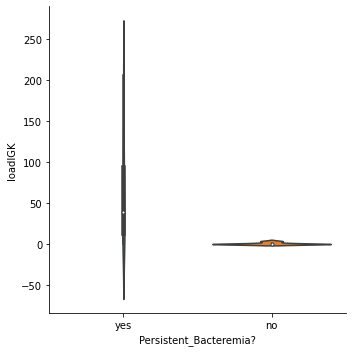

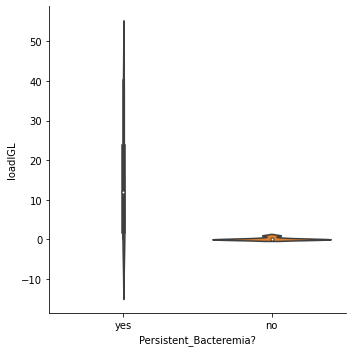

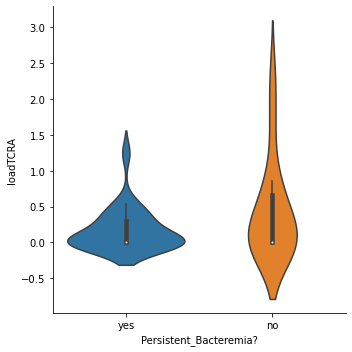

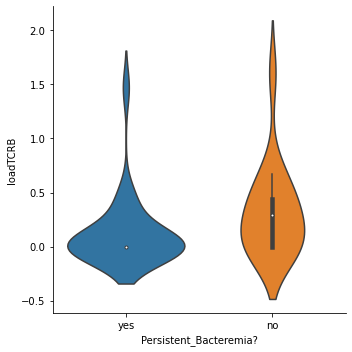

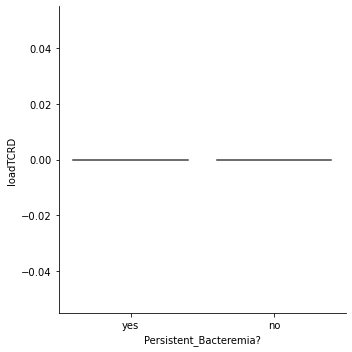

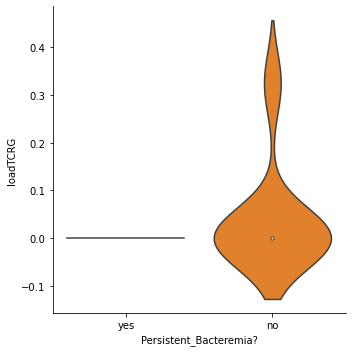

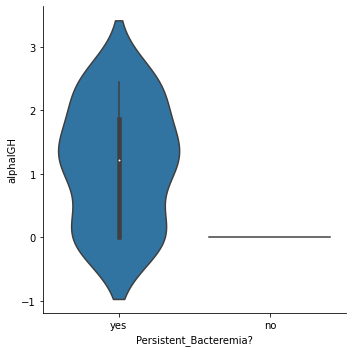

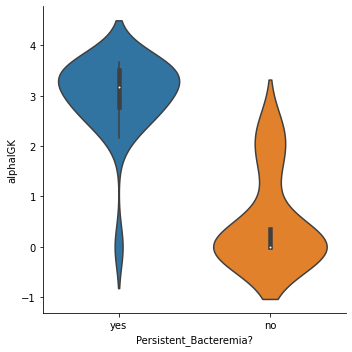

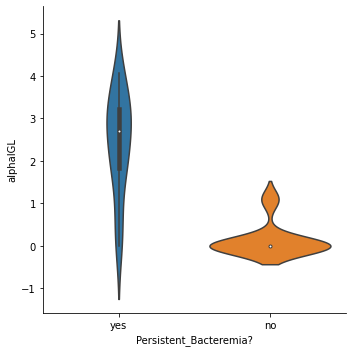

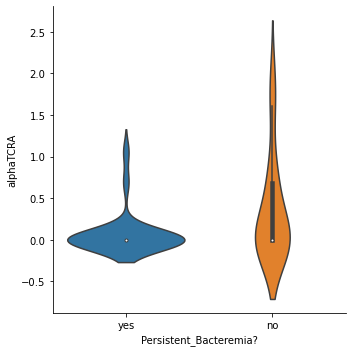

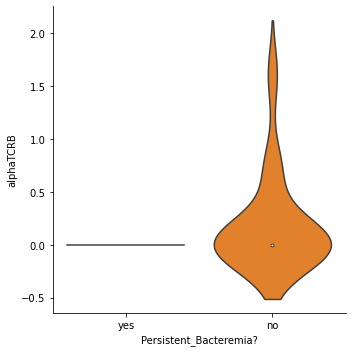

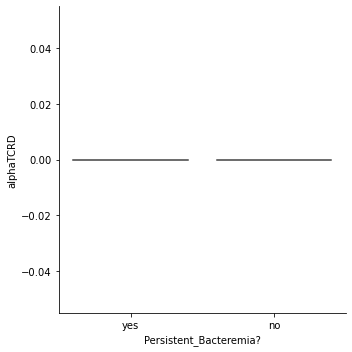

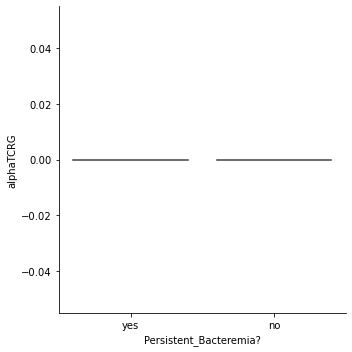

In [43]:
clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", 
              "nTCRG", "loadIGH", "loadIGK", "loadIGL", "loadTCRA", 
              "loadTCRB", "loadTCRD", "loadTCRG", "alphaIGH", "alphaIGK", 
              "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
for clonotype in clonotypes:
    g = sns.catplot(x="Persistent_Bacteremia?", y=clonotype,data=normalized_merged_meta_clonality_df, kind="violin")

/Users/dhrithideshpande/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


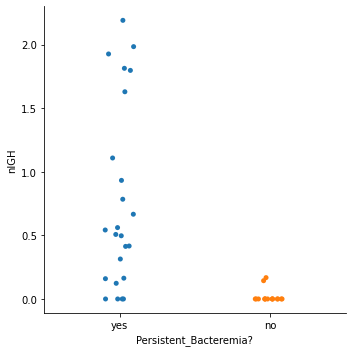

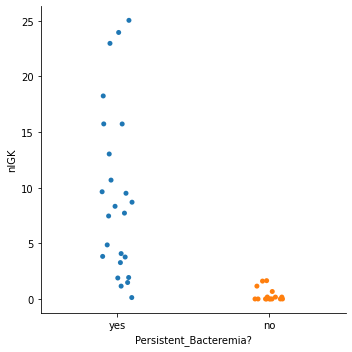

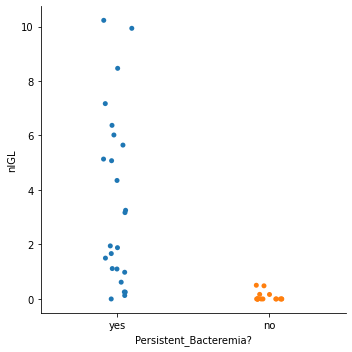

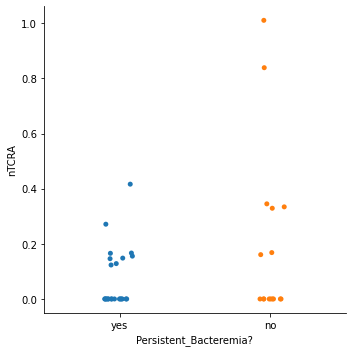

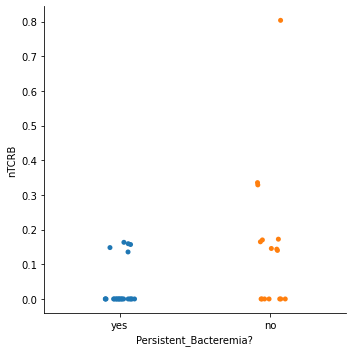

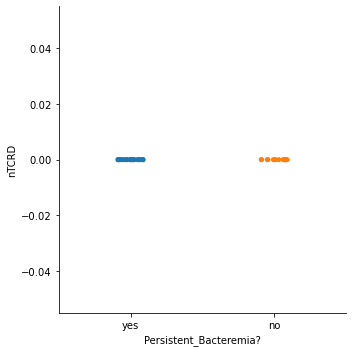

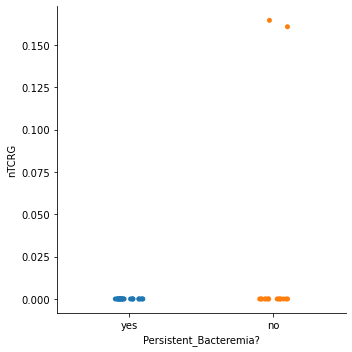

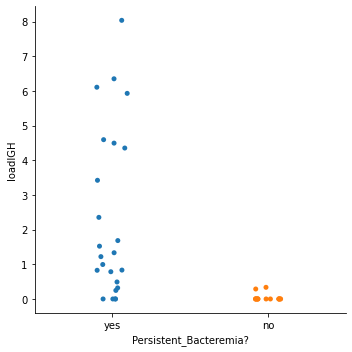

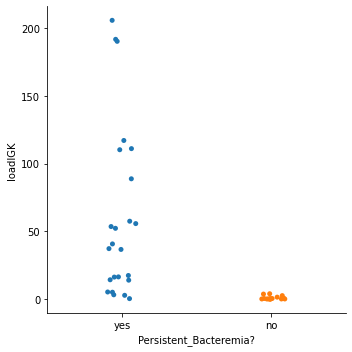

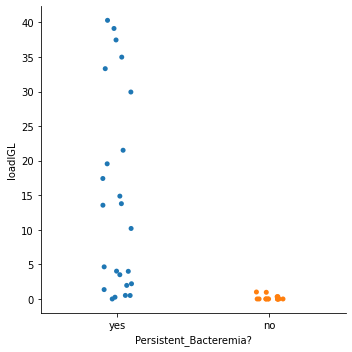

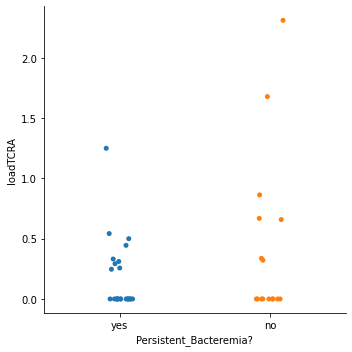

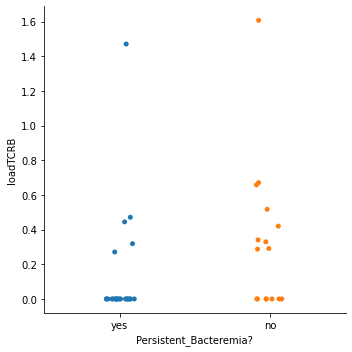

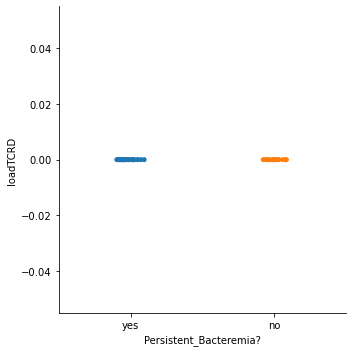

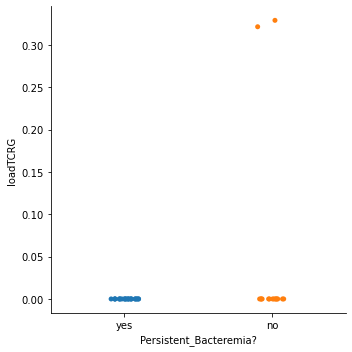

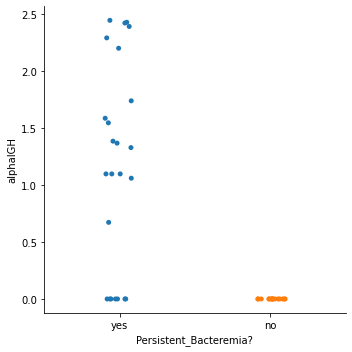

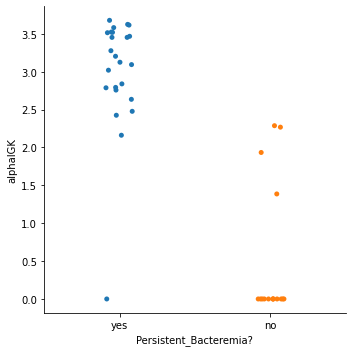

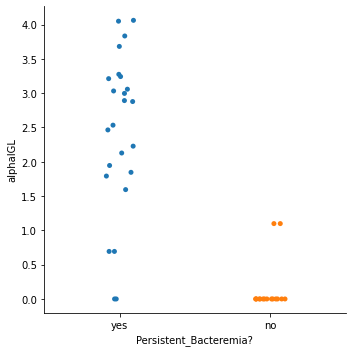

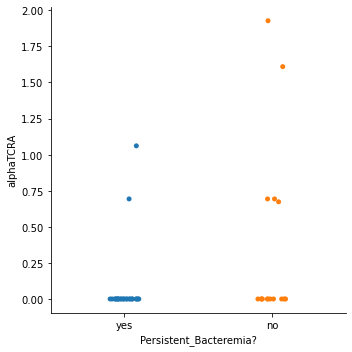

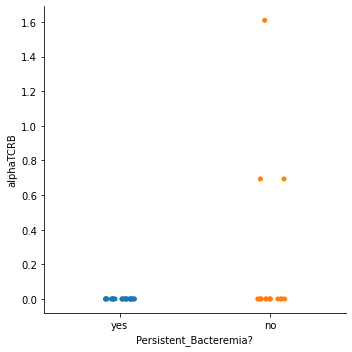

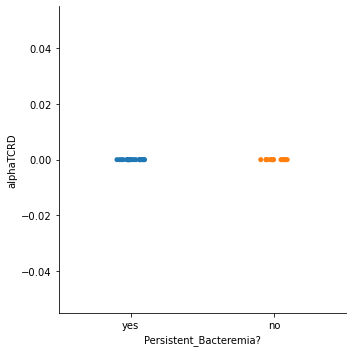

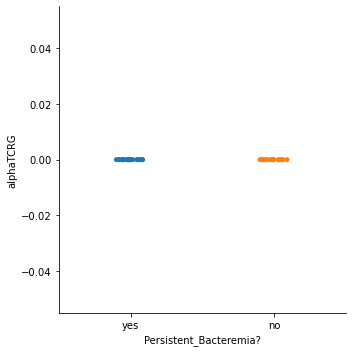

In [44]:
clonotypes = ["nIGH", "nIGK", "nIGL", "nTCRA", "nTCRB", "nTCRD", 
              "nTCRG", "loadIGH", "loadIGK", "loadIGL", "loadTCRA", 
              "loadTCRB", "loadTCRD", "loadTCRG", "alphaIGH", "alphaIGK", 
              "alphaIGL", "alphaTCRA", "alphaTCRB", "alphaTCRD", "alphaTCRG"]
for clonotype in clonotypes:
    g = sns.catplot(x="Persistent_Bacteremia?", y=clonotype, data=normalized_merged_meta_clonality_df)